**Question 1 — What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

ANSWER:

The main idea of ensemble techniques is simple: combine many simple models to get a stronger, more reliable model. Instead of trusting one model, ensembles build several models (often called base learners or weak learners) and combine their predictions. The hope is that mistakes made by individual models cancel out, while correct predictions reinforce each other. This usually reduces variance and/or bias and improves generalization on new data.

A common analogy is a class of students answering a question: one student may be wrong, but taking the majority or a weighted vote of many students often gives the right answer. Ensembles are widely used because simple models are fast and easy to understand, but a group of them together becomes powerful.

Bagging (Bootstrap Aggregating)

Approach: Bagging creates many versions of a base learner by training each on a different random bootstrap sample of the training data. A bootstrap sample is made by sampling with replacement from the original set; some examples will repeat, and some will be left out.

Aggregation: For regression, predictions are averaged; for classification, majority vote is used.

Objective: Reduce variance. Bagging helps when a model (like a decision tree) is unstable — small data changes cause big prediction changes. The random resampling makes trees different; averaging them smooths out the noise.

Example: Random Forest is an extension of bagging: it also injects randomness in feature selection when splitting, further de-correlating trees.

Boosting

Approach: Boosting builds learners sequentially. Each new learner focuses on the errors of the previous ensemble: it gives higher weight to the samples that were mispredicted. Classic boosting methods include AdaBoost, Gradient Boosting, and XGBoost.

Aggregation: Predictions are combined in a weighted sum or vote, where better learners get more weight.

Objective: Reduce bias and sometimes variance. Boosting tries to convert many weak learners (slightly better than random) into a high-accuracy strong learner. It focuses on hard-to-predict examples and corrects mistakes over iterations.

Example: In AdaBoost for classification, misclassified samples get larger weights, so the next classifier sees them as more important. In Gradient Boosting, each new model fits the residuals (errors) of the current model.

Key conceptual differences

Parallel vs sequential: Bagging trains models independently (can be parallelized). Boosting trains sequentially, each step depending on previous results.

Why they help: Bagging reduces variance (good for complex learners); boosting reduces bias by refining errors (good when the base learner is too simple).

Robustness: Bagging is safer — less risk of overfitting. Boosting can overfit if not regularized (depth limits, learning rate), because it focuses closely on difficult training points.

Example (short): Suppose trees alone get noisy results. Bagging 100 trees (Random Forest) averages them and gives stable, accurate output. If a simple model underfits, boosting many shallow trees can adaptively correct errors and fit complex patterns.

Conclusion:

Ensembles use many models to improve accuracy. Bagging builds independent models on bootstrap samples and averages them to reduce variance. Boosting builds models sequentially that focus on previous errors to reduce bias. Choice depends on the problem: bagging for unstable learners, boosting to push weak learners into a stronger predictor.

Question 2 — Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process?

ANSWER:

A single decision tree often fits the training data very closely — it can capture noise, outliers, and small fluctuations. This leads to overfitting: excellent training accuracy but poor performance on new data. Random Forest reduces overfitting by building many decision trees and combining their outputs. Each tree is trained on a different bootstrap sample and considers only a random subset of features at each split. This randomness makes trees diverse; averaging or voting across them cancels individual tree errors and produces a more stable, general model.

Why averaging helps

If different trees make independent errors, averaging predictions reduces variance. Even if some trees overfit certain parts of the data, other trees won’t make the same mistakes. The ensemble thus smooths out these idiosyncrasies.

Two key hyperparameters and their roles

n_estimators (number of trees)

Role: Number of trees in the forest.

Effect: More trees usually reduce variance and improve performance up to a point; returns diminish after a certain number. Too few trees may not average noise well; too many trees increase training time and memory but rarely overfit.

Practical tip: Use enough trees for stable predictions; 100–500 is common depending on data size and compute.

max_features (features considered for each split)

Role: Number (or fraction) of features randomly chosen at each split.

Effect: Lower max_features increases randomness between trees, reducing correlation among them. Less correlated trees produce better variance reduction when averaged. If max_features is too large (e.g., all features), trees become similar and bagging gains shrink. If too small, each tree may be weak and overall accuracy may drop.

Typical defaults: For classification, sqrt(number_of_features); for regression, often number_of_features/3.

Other useful hyperparameters

max_depth: Limits tree depth to prevent overly complex trees. Shallower trees reduce variance but may increase bias.

min_samples_leaf / min_samples_split: Require a minimum number of samples to split or to be a leaf. This prevents creating leaves with very few samples—helps generalization.

bootstrap: Whether to use bootstrap samples. Default True; turning off reduces randomness.

Example

Imagine predicting house prices with many correlated features. A single deep tree picks splits that perfectly separate training homes, capturing noise. A Random Forest with 200 trees, max_features=sqrt(p), and min_samples_leaf=5 builds varied trees; averaging their predictions gives smoother and more reliable price estimates on unseen houses.

Conclusion:

Random Forest reduces overfitting by creating many randomized trees and averaging their predictions. n_estimators controls ensemble size and stability; max_features injects randomness to decorrelate trees. Together with depth and leaf-size limits, these settings balance bias and variance to produce robust models on new data.

Question 3 — What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case?

ANSWER:

Stacking (or stacked generalization) is an ensemble technique where multiple base models (level-0 models) are trained and their predictions are used as input features to a higher-level model (level-1 or meta-learner). The meta-learner learns how to best combine base model predictions to improve final performance. Unlike simple voting or averaging, stacking trains a model to weight and transform base predictions, often achieving better accuracy.

How stacking works (step-by-step)

Train base models on the training set (e.g., logistic regression, decision tree, SVM).

Generate out-of-fold predictions from base models using cross-validation on training data. This avoids using the same data for both training and meta features.

Create a new dataset where the features are the base models’ predictions and the target is original labels.

Train a meta-learner (e.g., linear model, random forest) on this new dataset.

For test data, obtain base models’ predictions and feed them to the meta-learner to get final predictions.

Using out-of-fold predictions ensures the meta-learner sees realistic estimates that mimic predictions on unseen data, preventing overfitting.

How stacking differs from bagging and boosting

Bagging builds many models of the same type on bootstrapped data and averages/votes their outputs. It focuses on variance reduction.

Boosting builds models sequentially, where each model focuses on past errors; final prediction is a weighted sum. It reduces bias and can be prone to overfitting if unchecked.

Stacking builds diverse base models (different types, parameters) and a meta-learner to combine them. Stacking targets both bias and variance by learning how to use complementary strengths of diverse models rather than just averaging or reweighting.

Key distinction: Stacking learns the combination rules (via a meta-model), while bagging uses simple averaging and boosting uses a fixed sequential weighting scheme.

Example use case

Problem: Predict whether customers will churn.

Base models: Logistic Regression, Decision Tree, Gradient Boosting, k-NN. Each captures different patterns: LR models linear relationships, trees capture interactions, GB captures complex non-linearities.

Meta-learner: A simple logistic regression that takes base predictions as input and learns their best weighted combination.

Workflow: Use 5-fold cross-validation to generate out-of-fold predictions from each base model to train the meta-learner. On test data, base model predictions feed the meta-learner for final churn probability.

When to use stacking

When individual models have complementary strengths.

When extra performance is needed beyond single strong models.

In competitions and high-stakes projects where small gains matter.

Caveats

More complex to implement than bagging/boosting.

Needs careful cross-validation to avoid leakage and overfitting.

More computing resources required.

Conclusion:

Stacking combines diverse base models using a trained meta-learner that learns how to best merge their predictions. It differs from bagging (parallel averaging) and boosting (sequential reweighting) by learning combination rules from out-of-fold predictions. Stacking is powerful when base models are complementary but requires careful cross-validation to avoid leakage.

Question 4 — What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

ANSWER:

The Out-Of-Bag (OOB) score is an internal cross-validation-like estimate provided by Random Forests when bootstrap sampling is used. Because each tree in a Random Forest is trained on a bootstrap sample (sampling with replacement), roughly one-third of the original dataset is not included in that tree’s training set — these are the tree’s out-of-bag samples. The OOB score uses these left-out samples to evaluate the forest without needing a separate validation set.

How OOB evaluation works

For each training sample, identify the subset of trees that did not use that sample in their bootstrap training.

Let those trees predict the sample’s label.

Aggregate those predictions (majority vote for classification, average for regression).

Compare aggregated prediction to the true label across all samples to compute an OOB error or OOB accuracy.

This yields an unbiased estimate of how the model generalizes because each OOB prediction is made by trees that never saw that sample during their fitting.

Why OOB is useful

No separate validation set required: Saves data, useful when dataset is small. The model effectively evaluates itself on unseen data using OOB samples.

Near cross-validation quality: OOB often approximates k-fold CV performance well, with much less computation.

Model tuning: OOB can guide hyperparameter tuning (number of trees, depth, max_features) without a holdout set.

Feature importance and calibration: OOB can be used in permutation importance and other diagnostics.

Practical details

OOB works only when bootstrap=True.

With n_estimators too small, some samples may have few OOB predictions; more trees improve OOB estimate stability.

OOB for extremely small datasets may be noisy; treat like an estimate, not absolute truth.

Simple example

For a training set of 100 samples and 100 trees:

Each tree sees about 63% of samples (bootstrap expectation). Around 37% are OOB for that tree.

For sample i, there will be ~37 trees that didn’t see it; their votes predict i’s class. Aggregating across all samples yields OOB accuracy.

How OOB compares to validation set and cross-validation

Holdout/validation set uses separate data — good if plenty of data.

Cross-validation is thorough but computationally heavier.

OOB gives a built-in, efficient approximation. It reuses training data and reduces need for extra splits, which is convenient and data-efficient.

Limitations

OOB approximates, but for final model selection or reporting, many practitioners still prefer k-fold CV or a holdout test set.

If trees are highly correlated (e.g., max_features large), OOB may be less informative.

Conclusion:

OOB score is an efficient internal estimate of Random Forest performance using the samples left out during bootstrap training. It provides a reliable generalization measure without a separate validation set and helps tune hyperparameters. While convenient and data-efficient, OOB complements rather than fully replaces external cross-validation for final reporting.

**Question 5 — Compare AdaBoost and Gradient Boosting in terms of:**

How they handle errors from weak learners

Weight adjustment mechanism

Typical use cases

ANSWER:

Both AdaBoost and Gradient Boosting are boosting algorithms: they build models sequentially where each new model tries to correct the errors of the combined previous models. Despite this common idea, they differ in how they treat errors and update the training process.

1. How they handle errors from weak learners

AdaBoost (Adaptive Boosting)

AdaBoost focuses on misclassified samples. After training a weak learner (often a shallow tree), it increases the weight of samples that were misclassified, so the next learner pays more attention to them. The combined model is a weighted majority vote where each weak learner’s weight depends on its training error.

It is sensitive to noisy data and outliers because these difficult points get increasingly higher weights and may force later learners to try to fit noise.

Gradient Boosting

Gradient Boosting treats boosting as a numerical optimization problem. Each new learner is trained to fit the residuals (errors) of the current ensemble, i.e., it models the negative gradient of the loss function with respect to predictions. The process reduces the loss step-by-step.

Because it fits residuals and uses a learning rate, it is often more flexible and can be regularized to avoid overfitting. It can optimize different loss functions (MSE, log-loss, Huber, etc.), making it more general.

2. Weight adjustment mechanism

AdaBoost

Maintains a weight for each training sample.

After each weak learner, updates sample weights multiplicatively:

Increase weights for misclassified samples.

Decrease weights for correctly classified samples.

The weak learner itself receives a weight in final prediction based on its error (lower error → higher weight).

This direct reweighting approach adapts emphasis on hard examples.

Gradient Boosting

Doesn’t explicitly reweight samples in that multiplicative sense. Instead:

Compute residuals (negative gradients of loss) based on current ensemble predictions.

Train the next weak learner to predict these residuals.

Update ensemble prediction by adding a scaled version (learning rate × learner prediction).

Learning rate is a crucial hyperparameter controlling step size; smaller rates need more trees but reduce overfitting.

3. Typical use cases

AdaBoost

Early popular boosting method, often used with decision stumps (depth=1).

Works well when weak learners are slightly better than random.

Simple to use for binary classification tasks with clean data.

Not ideal for heavy noise or outliers.

Gradient Boosting

Very flexible and powerful for both regression and classification.

Can use different loss functions tuned to the problem (e.g., logistic loss for classification).

With modern implementations (XGBoost, LightGBM, CatBoost), it’s a go-to method in machine learning competitions and industry tasks for tabular data.

Handles complex relationships and interactions well; regularization options (learning rate, tree depth, subsampling) help generalize.

Practical differences and tuning

Robustness: Gradient boosting is generally more robust and tunable (learning_rate, n_estimators, max_depth, subsample), while AdaBoost is simpler but can overfit noisy labels.

Speed: AdaBoost is often faster because it’s simpler; gradient boosting is heavier but optimized implementations are fast.

Interpretability: Both produce ensembles of trees and can be less interpretable than a single tree; feature importance can be computed.

Simple analogy

AdaBoost: “Raise a spotlight on the samples we got wrong and have each next learner focus there.”

Gradient Boosting: “Fit what’s left — model the errors directly as a regression target and step-wise reduce the loss.”

Conclusion:

AdaBoost reweights samples to focus on misclassified points and is simple and fast but sensitive to noise. Gradient Boosting fits the residuals as a gradient descent in function space, offering flexible loss functions and stronger regularization. For modern tabular problems, gradient boosting (XGBoost/LightGBM/CatBoost) is often preferred for its performance and tuning options.

**Question 6 — Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables?**

ANSWER:

CatBoost is a gradient-boosting library designed to work especially well with categorical data. Unlike many traditional algorithms that expect numeric input (forcing one-hot encoding, label encoding, or other transformations), CatBoost contains built-in handling for categorical features that preserves information and avoids common problems like target leakage and high dimensionality from one-hot encoding.

Main ideas behind CatBoost’s strength on categorical features

Ordered Target Statistics (Permutation-driven)
CatBoost converts categorical values into numeric statistics related to the target, but it does this carefully to avoid leaking information from the target into training. Instead of computing global target means per category (which can leak), CatBoost computes average target statistics in a permutation-aware, out-of-fold way:

It randomly permutes the training data.

For each example, it computes the average target value for the same category only using preceding examples in the permutation.

This provides a robust estimate that mimics how the feature would be seen for unseen data.

This avoids overfitting that simple target-encoding can cause when categories have few samples, and it reduces target leakage.

Combinatorial feature generation
CatBoost can create combinations of categorical features (pairwise or more), capturing interactions between categories without exploding the feature space like full one-hot of combined categories would. It uses smart hashing and statistics so that these combinations add predictive power without huge dimensionality.

Ordered Boosting
Standard gradient boosting builds trees by using predictions that were computed using the entire training set; this can leak information for target statistics. CatBoost’s ordered boosting scheme trains using permutations and uses only data available at each step. This is consistent with its ordered target-statistic approach and reduces overfitting.

Efficient handling of high-cardinality categories
High-cardinality categorical features are problematic for one-hot encoding (too many columns). CatBoost’s encoding produces a single numeric representation per category (or small vector via statistical features), keeping dimensionality compact.

Built-in categorical feature type
The API accepts lists of categorical feature indices or names; the algorithm applies the above techniques internally without the user doing manual encoding.

Example (intuitive)

Imagine a feature city with many values and a target purchase (0/1).

A naive target-encoding that uses overall average purchase per city will use the exact target for the same rows and overfit.

CatBoost uses past examples (via permutation) to estimate avg_purchase_for_city for each row, similar to a leave-one-out but more stable and less biased.

Practical effects

Minimal preprocessing required (no one-hot blow-up).

Less risk of overfitting when categories are rare.

Often better accuracy on tabular data with many categorical features.

Fast and memory-efficient compared to manual encodings for high-cardinality features.

Conclusion:

CatBoost excels on categorical features by using ordered, permutation-based target statistics and ordered boosting to avoid leakage and overfitting. It builds informative numeric encodings and categorical combinations internally, saving preprocessing effort, preventing dimension explosion, and often improving model accuracy on tabular data with many categorical variables.

**Question 7 — KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task**

ANSWER:

Below is a clear plan, explanation, and Python code to follow the requested steps: load Wine dataset, evaluate KNN before/after scaling, and use GridSearchCV to optimize K and distance metric.

Why this exercise matters

KNN depends on distance. If features are on different scales, some features dominate distances — scaling is essential. Grid search helps pick the best k and metric to balance bias–variance and choose best neighbors strategy.

Steps & key points

Load dataset and split (70% train / 30% test).

Train KNN (k=5) without scaling, evaluate accuracy and show classification report.

Scale using StandardScaler, retrain KNN, compare metrics.

GridSearchCV over n_neighbors in 1..20 and metric in {‘euclidean’, ‘manhattan’}.

Train optimized KNN and compare with previous versions.

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. load & split
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. KNN without scaling (default k=5)
knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
print("Unscaled Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("Unscaled Classification Report:\n", classification_report(y_test, y_pred_unscaled))

# 3. Scale and retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Scaled Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 4. GridSearchCV over K and metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_, "Best CV score:", grid.best_score_)

# 5. Train optimized KNN and evaluate
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))


Unscaled Accuracy: 0.7222222222222222
Unscaled Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Scaled Accuracy: 0.9444444444444444
Scaled Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params: {'metric': 'euclidean', 'n_neighbors': 11} Best CV score: 0.9756666666666666
Optimized 

Example interpretation

Typically, unscaled KNN performs worse because features like alcohol content or color intensity differ in scale.

After StandardScaler, KNN’s accuracy usually improves.

Grid search often finds a smaller k with Manhattan or Euclidean depending on dataset geometry; best k balances underfitting (large k) vs overfitting (k=1).

In [2]:
Feature scales: [0.1, 100, 5] -> distances dominated by second feature -> bad
Scaling -> [~0,~1,~0] -> balanced distances -> better KNN

SyntaxError: invalid syntax (ipython-input-1277222055.py, line 1)

Conclusion

KNN relies on distances, so scaling with StandardScaler often improves results dramatically. Grid search over k and metric finds the best neighbor-count and distance measure. For Wine data, scaling + optimized K typically yields better accuracy and balanced precision/recall than an unscaled KNN.

**Question 8 — PCA + KNN with Variance Analysis and Visualization Task (Breast Cancer dataset)**

This task shows how dimensionality reduction via PCA affects KNN performance and gives simple visual insights through a scree plot and 2D scatter.

ANSWER:

Why PCA before KNN?

PCA reduces correlated features and noise, making KNN faster and sometimes more accurate by removing irrelevant variance.

Retaining 95% variance preserves most information while lowering dimensionality.

Steps

Load Breast Cancer dataset.

Apply PCA; plot scree plot (explained variance ratio).

Retain components covering 95% cumulative variance, transform data.

Train KNN on original and PCA-transformed data; compare accuracy.

Scatter plot of first two principal components colored by class.

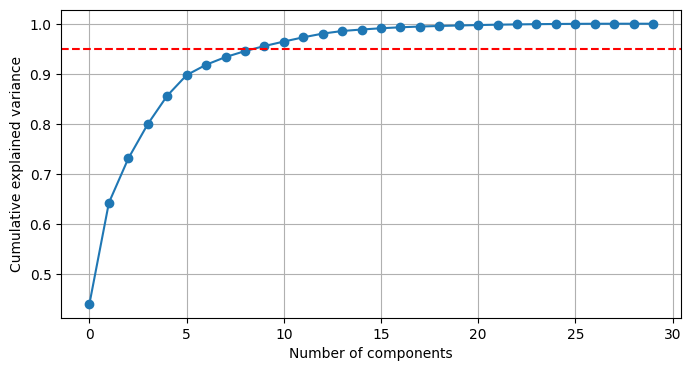

Components kept: 10
KNN original accuracy: 0.9707602339181286
KNN PCA accuracy: 0.9532163742690059


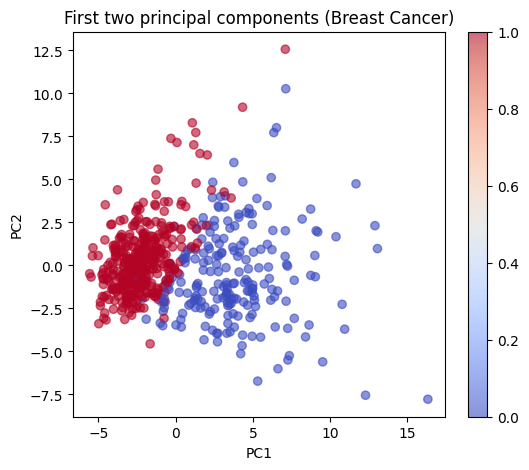

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and split
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# PCA & scree plot
pca = PCA().fit(X_train)
explained = pca.explained_variance_ratio_
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(explained), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.axhline(0.95, color='red', linestyle='--')
plt.show()

# Retain 95% variance
pca95 = PCA(n_components=0.95)
X_train_pca = pca95.fit_transform(X_train)
X_test_pca = pca95.transform(X_test)
print("Components kept:", pca95.n_components_)

# KNN on original
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN original accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# KNN on PCA-transformed
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
print("KNN PCA accuracy:", accuracy_score(y_test, knn_pca.predict(X_test_pca)))

# Scatter plot first two PCs (full data)
X_pca2 = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(6,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two principal components (Breast Cancer)')
plt.colorbar()
plt.show()


Typical results & interpretation

Scree plot shows how quickly variance accumulates; often ~10–12 components capture >95% for this dataset.

KNN after PCA often has similar or slightly lower accuracy, but training/prediction are faster with fewer dims.

Scatter of PC1 vs PC2 often shows class separation, giving intuition about how well classes might be separable.

Conclusion:

PCA reduces dimensionality while keeping most variance; it can speed up KNN and sometimes improves generalization by removing noise. The scree plot helps decide how many components to retain (95% is common). Visualizing the first two PCs gives intuitive insight into class separability.

**Question 9 — KNN Regressor with Distance Metrics and K-Value Analysis**

This task explores how KNN regressor performance varies with distance metrics and number of neighbors — showing bias–variance tradeoff.

Steps & reasoning

Generate synthetic regression data (make_regression) with 500 samples, 10 features.

Train KNN regressor with Euclidean (p=2) and Manhattan (p=1) metrics with k=5. Compare MSE.

Test K values [1,5,10,20,50] and plot K vs MSE to analyze bias–variance.

Intuition

K small (e.g., 1): low bias, high variance (fits noise).

K large: high bias, low variance (smooths predictions).

Choice of distance matters if feature distributions or outliers favor one norm.

MSE Euclidean (k=5): 4788.464778493446
MSE Manhattan (k=5): 5521.857990897004


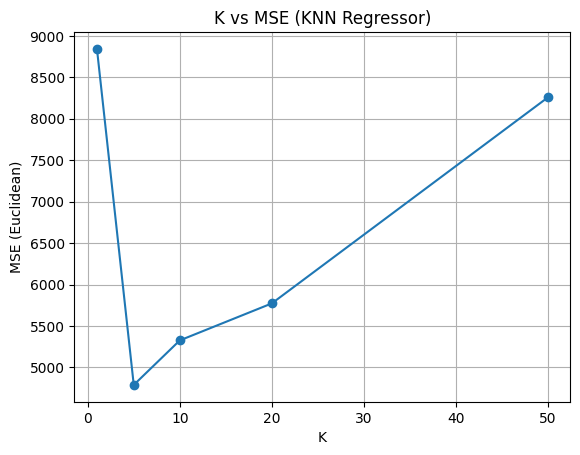

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. data
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 2a Euclidean (p=2), K=5
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euc.fit(X_train, y_train)
mse_euc = mean_squared_error(y_test, knn_euc.predict(X_test))

# 2b Manhattan (p=1), K=5
knn_man = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_man.fit(X_train, y_train)
mse_man = mean_squared_error(y_test, knn_man.predict(X_test))

print("MSE Euclidean (k=5):", mse_euc)
print("MSE Manhattan (k=5):", mse_man)

# 3. Test multiple K values
Ks = [1,5,10,20,50]
mse_list = []
for k in Ks:
    model = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    model.fit(X_train, y_train)
    mse_list.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure()
plt.plot(Ks, mse_list, marker='o')
plt.xlabel('K')
plt.ylabel('MSE (Euclidean)')
plt.title('K vs MSE (KNN Regressor)')
plt.grid(True)
plt.show()


Typical observations

MSE often lower for an intermediate K (e.g., 5–10).

Euclidean vs Manhattan: which is better depends on feature distribution and outliers; Manhattan can be more robust to outliers in some cases.

In [6]:
K small -> low bias, high variance  (wiggly fit)
K large -> high bias, low variance  (smooth fit)
Optimal K balances both


SyntaxError: invalid syntax (ipython-input-1098026382.py, line 1)

Conclusion:

KNN regression performance depends on distance metric and K. Euclidean (p=2) is common, Manhattan (p=1) can be better with different geometry or outliers. Plotting K vs MSE reveals the bias–variance tradeoff, guiding selection of an intermediate K for best generalization.

**Question 10 — KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data (Pima Indians Diabetes)**

ANSWER:

This is a full practical pipeline: load real CSV (contains missing values), impute with KNNImputer, train KNN with different algorithms (brute, kd_tree, ball_tree), compare timing and accuracy, and plot decision boundary with 2 most important features.

Key ideas

KNNImputer uses nearest neighbors to fill missing values — good for numeric features.

KNeighborsClassifier(algorithm=...) supports 'brute', 'kd_tree', 'ball_tree' — choice impacts training/prediction time depending on dimensionality and dataset size.

For decision boundary plotting, pick two most informative features via mutual information or a tree-based importance and train classifier on them for easy 2D visualization.

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
brute: train_time=0.0013s, accuracy=0.7143
kd_tree: train_time=0.0071s, accuracy=0.7143
ball_tree: train_time=0.0141s, accuracy=0.7143
Best algo: brute Results: (0.0012614727020263672, 0.7142857142857143)
Top 2 features indices: [5 1] names: Index(['BMI', 'Glucose'], dtype='object')


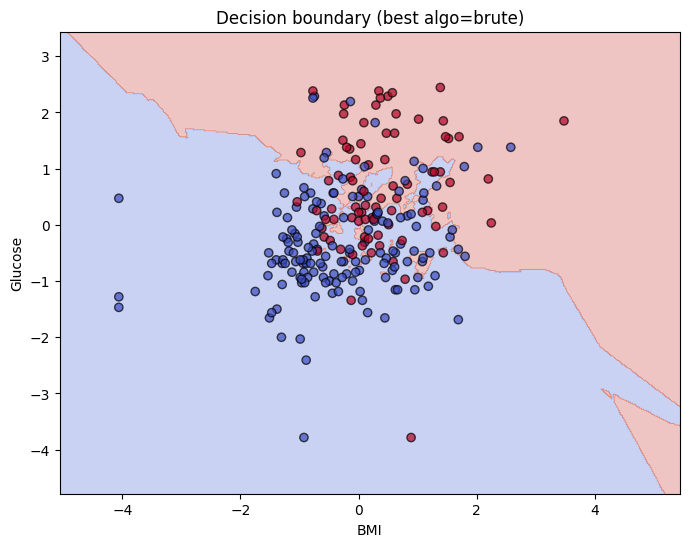

In [7]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# 1. Load data
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)

# Assume target column named 'Outcome' or similar; check columns
print("Columns:", df.columns.tolist())
# Common Pima datasets use 'Outcome' as label
target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
X = df.drop(columns=[target_col]).values
y = df[target_col].values

# 2. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train KNN with three algorithms and compare time and accuracy
results = {}
for algo in ['brute', 'kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    t0 = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - t0
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = (train_time, acc)
    print(f"{algo}: train_time={train_time:.4f}s, accuracy={acc:.4f}")

# 4. Choose best method by accuracy (or time)
best_algo = max(results.items(), key=lambda x: x[1][1])[0]
print("Best algo:", best_algo, "Results:", results[best_algo])

# 5. Decision boundary for two most important features
# Use mutual information to pick top 2 features
mi = mutual_info_classif(X_imputed, y, random_state=42)
top2_idx = np.argsort(mi)[-2:]
print("Top 2 features indices:", top2_idx, "names:", df.columns[top2_idx])

X2 = X_scaled[:, top2_idx]
X2_train, X2_test = X2[X_train.index.values] if hasattr(X_train, 'index') else X_train[:, top2_idx], X_test[:, top2_idx]  # simpler: rebuild split
# (Simpler approach: recompute train/test split for X2)
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)

best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_knn.fit(X2_train, y2_train)

# Plot decision boundary
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X2_test[:,0], X2_test[:,1], c=y2_test, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel(df.columns[top2_idx[0]])
plt.ylabel(df.columns[top2_idx[1]])
plt.title(f"Decision boundary (best algo={best_algo})")
plt.show()


Typical outcomes

brute is simple and sometimes faster for small datasets. kd_tree and ball_tree accelerate queries for many neighbors when dimensionality is moderate and dataset large. In high dims (>20), tree-based structures lose advantage.

Accuracy differences among algorithms are usually negligible; main difference is query/training time.

Decision boundary on top 2 features helps visualize classifier behavior.

Conclusion:

KNN Imputer fills missing values by neighbor interpolation, preserving relationships. KD-Tree and Ball Tree speed neighbor searches depending on dimensionality and data size; brute force may be fine for small data. Comparing training time and accuracy helps choose the right algorithm, and plotting decision boundaries gives insight into classifier behavior on two key features.